In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [340]:

import pandas as pd

# Charger les deux DataFrames
data1 = pd.read_json('/content/match_1.json', orient='records')
data2 = pd.read_json('/content/match_2.json', orient='records')

# Concaténer les deux DataFrames en un seul en utilisant append
merged_data = data1.append(data2, ignore_index=True)

# Sauvegarder le DataFrame combiné dans un fichier
merged_data.to_json('/content/data.json', orient='records')



<ipython-input-340-128faa4ac338>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = data1.append(data2, ignore_index=True)


In [341]:
data = pd.read_json('/content/data.json', orient='records')


In [342]:
data

,label,norm
0,walk,"[23.1770373364, 23.3615252852, 21.535253403, 2..."
1,walk,"[20.9982143839, 19.1827980598, 18.272491463, 1..."
2,walk,"[21.9525968202, 20.6272048442, 22.5554077274, ..."
3,walk,"[19.3920974836, 19.3046066529, 18.9787708781, ..."
4,rest,"[22.0692630377, 19.6722704832, 19.8821501933, ..."
...,...,...
1182,walk,"[23.33730577, 20.2109879112, 25.0641297861, 23..."
1183,walk,"[22.4703228139, 22.552427731, 23.8426232022, 2..."
1184,walk,"[43.8336127058, 46.1804599858, 37.492367105, 3..."
1185,walk,"[30.9275992558, 31.2635825881, 28.2869436092, ..."


In [343]:
data.describe()

,label,norm
count,1187,1187
unique,9,1187
top,run,"[23.1770373364, 23.3615252852, 21.535253403, 2..."
freq,552,1


In [344]:
action_counts = data['label'].value_counts()
print(action_counts)

run          552
walk         435
dribble       78
rest          35
pass          32
tackle        31
shot          18
cross          4
no action      2
Name: label, dtype: int64


In [345]:
# Filtrer les données pour l'action "walk"
walk_data = data[data['label'] == 'walk']

# Liste des valeurs d'accélération de l'action "walk" (liste imbriquée)
acceleration_values_nested = walk_data['norm'].tolist()

# Aplatir la liste imbriquée en une seule liste
acceleration_values = [item for sublist in acceleration_values_nested for item in sublist]

# Conversion en tableau NumPy
acceleration_array = np.array(acceleration_values, dtype=float)

# Calcul des statistiques descriptives avec numpy
if acceleration_array.size > 0:
    mean_acceleration = np.mean(acceleration_array)
    std_deviation = np.std(acceleration_array)
    median_acceleration = np.median(acceleration_array)
    min_acceleration = np.min(acceleration_array)
    max_acceleration = np.max(acceleration_array)

    print(f'Moyenne d\'accélération pour "walk": {mean_acceleration}')
    print(f'Écart-type d\'accélération pour "walk": {std_deviation}')
    print(f'Médiane d\'accélération pour "walk": {median_acceleration}')
    print(f'Valeur minimale d\'accélération pour "walk": {min_acceleration}')
    print(f'Valeur maximale d\'accélération pour "walk": {max_acceleration}')
else:
    print("Aucune donnée d'accélération disponible pour l'action 'walk'.")


Moyenne d'accélération pour "walk": 28.320189265213145
Écart-type d'accélération pour "walk": 15.130771799441973
Médiane d'accélération pour "walk": 23.7807019428
Valeur minimale d'accélération pour "walk": 1.9996154845
Valeur maximale d'accélération pour "walk": 549.5750681192


In [346]:
#GENERALISATION


# Trouver les labels uniques dans les données
unique_labels = data['label'].unique()

for label in unique_labels:
    # Filtrer les données pour le label actuel
    label_data = data[data['label'] == label]

    # Liste des valeurs d'accélération du label (liste imbriquée)
    acceleration_values_nested = label_data['norm'].tolist()

    # Aplatir la liste imbriquée en une seule liste
    acceleration_values = [item for sublist in acceleration_values_nested for item in sublist]

    # Conversion en tableau NumPy
    acceleration_array = np.array(acceleration_values, dtype=float)

    # Calcul des statistiques descriptives avec numpy
    if acceleration_array.size > 0:
        mean_acceleration = np.mean(acceleration_array)
        std_deviation = np.std(acceleration_array)
        median_acceleration = np.median(acceleration_array)
        min_acceleration = np.min(acceleration_array)
        max_acceleration = np.max(acceleration_array)

        print(f'Statistiques descriptives pour l\'action "{label}":')
        print(f'Moyenne d\'accélération: {mean_acceleration}')
        print(f'Écart-type d\'accélération: {std_deviation}')
        print(f'Médiane d\'accélération: {median_acceleration}')
        print(f'Valeur minimale d\'accélération: {min_acceleration}')
        print(f'Valeur maximale d\'accélération: {max_acceleration}\n')
    else:
        print(f"Aucune donnée d'accélération disponible pour l'action '{label}'.")

# Vous pouvez enregistrer ces statistiques dans une structure de données si nécessaire.


Statistiques descriptives pour l'action "walk":
Moyenne d'accélération: 28.320189265213145
Écart-type d'accélération: 15.130771799441973
Médiane d'accélération: 23.7807019428
Valeur minimale d'accélération: 1.9996154845
Valeur maximale d'accélération: 549.5750681192

Statistiques descriptives pour l'action "rest":
Moyenne d'accélération: 21.74115992607964
Écart-type d'accélération: 4.603126102939333
Médiane d'accélération: 20.7698842849
Valeur minimale d'accélération: 5.0728683605
Valeur maximale d'accélération: 101.9427471459

Statistiques descriptives pour l'action "run":
Moyenne d'accélération: 53.205259550894986
Écart-type d'accélération: 46.91283681115826
Médiane d'accélération: 43.0340572707
Valeur minimale d'accélération: 1.6746297206
Valeur maximale d'accélération: 759.8614139522

Statistiques descriptives pour l'action "tackle":
Moyenne d'accélération: 65.58008355251424
Écart-type d'accélération: 75.05311578947212
Médiane d'accélération: 44.7716982563
Valeur minimale d'accélér

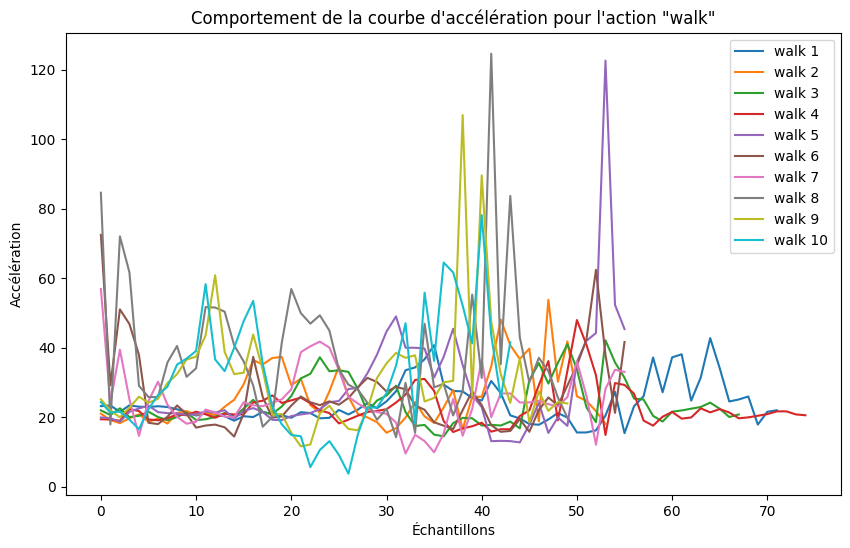

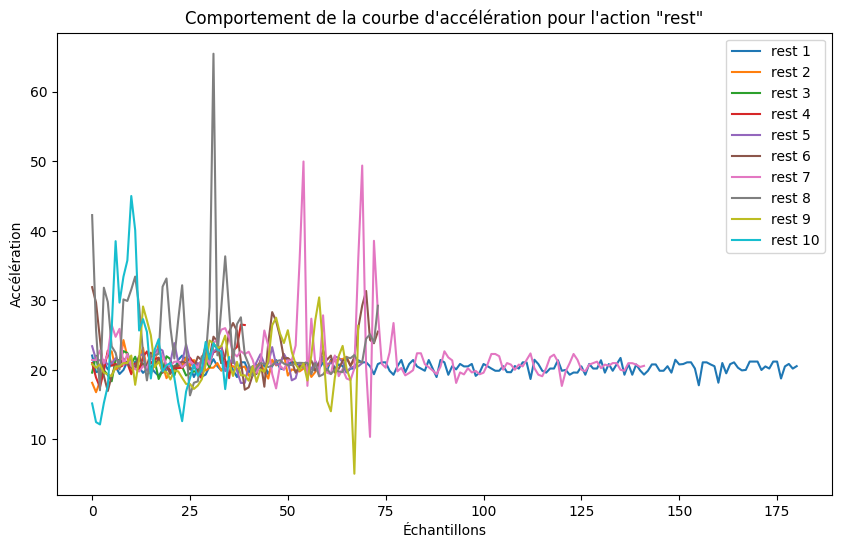

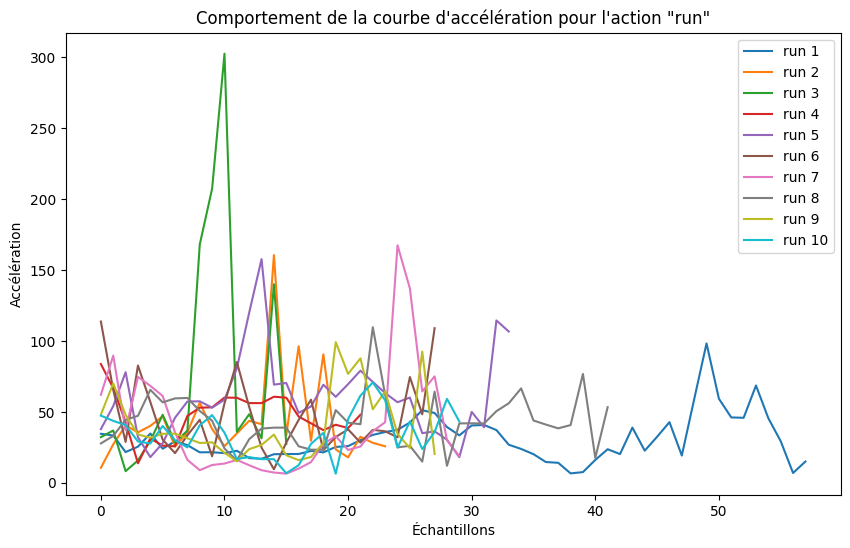

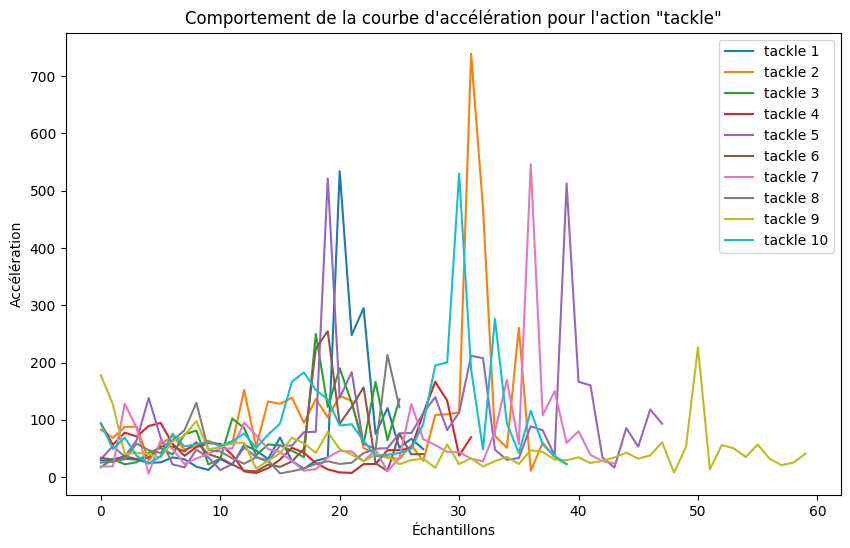

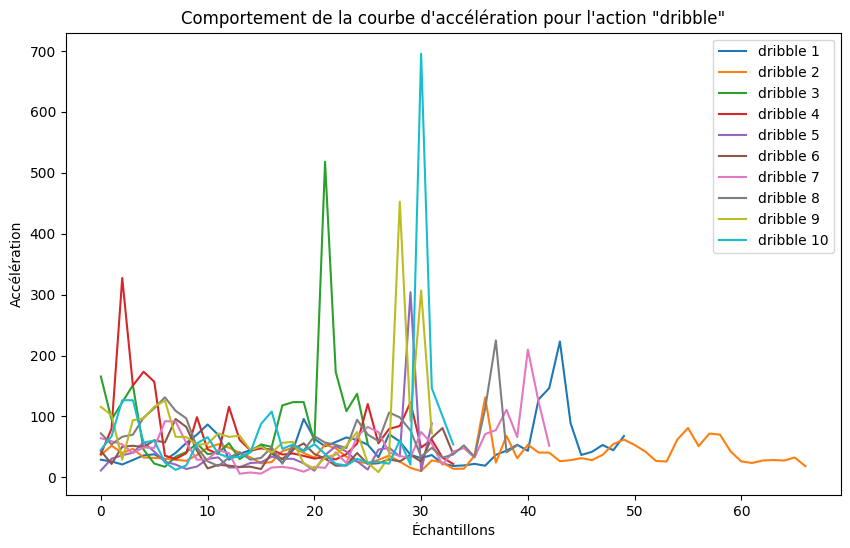

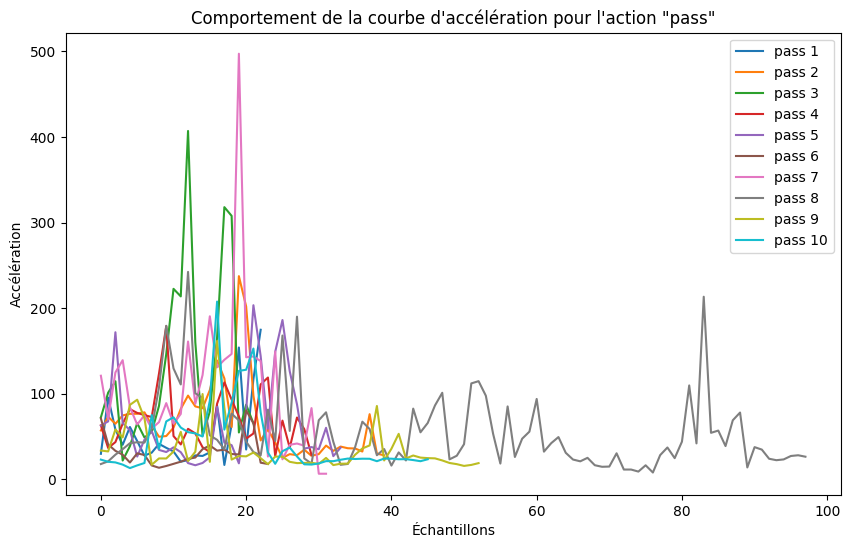

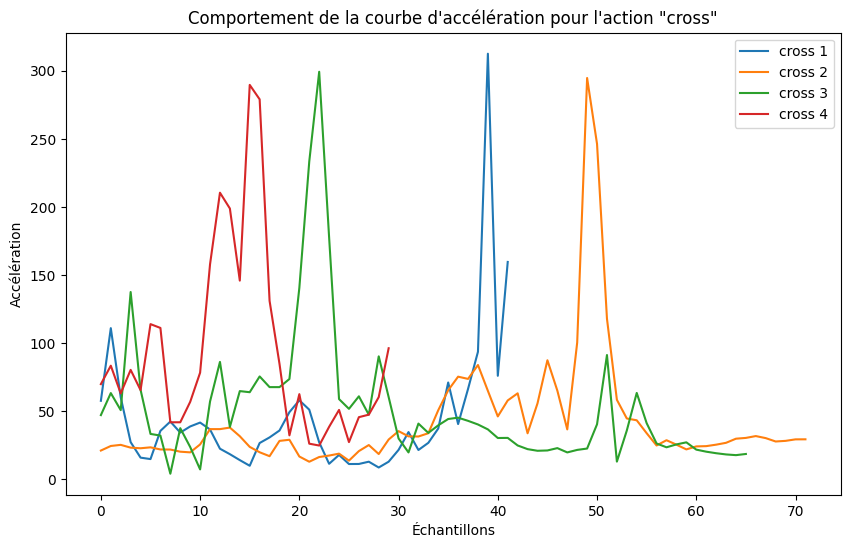

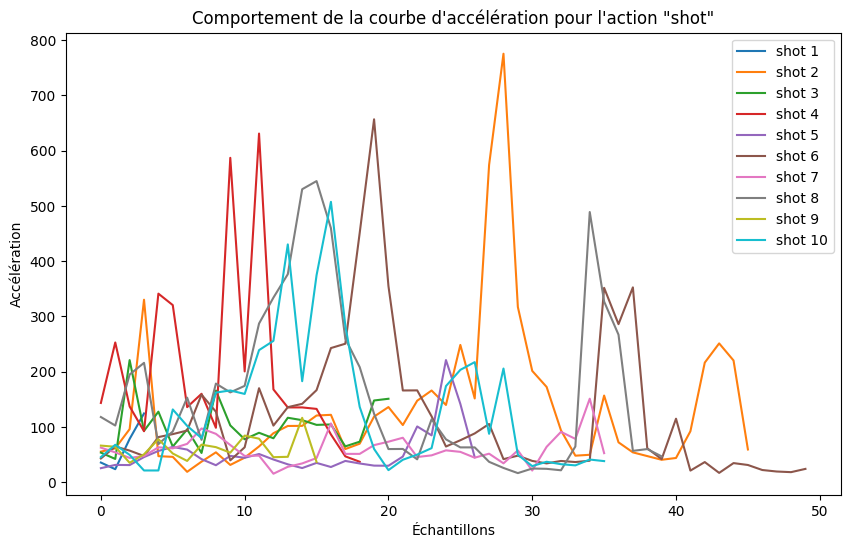

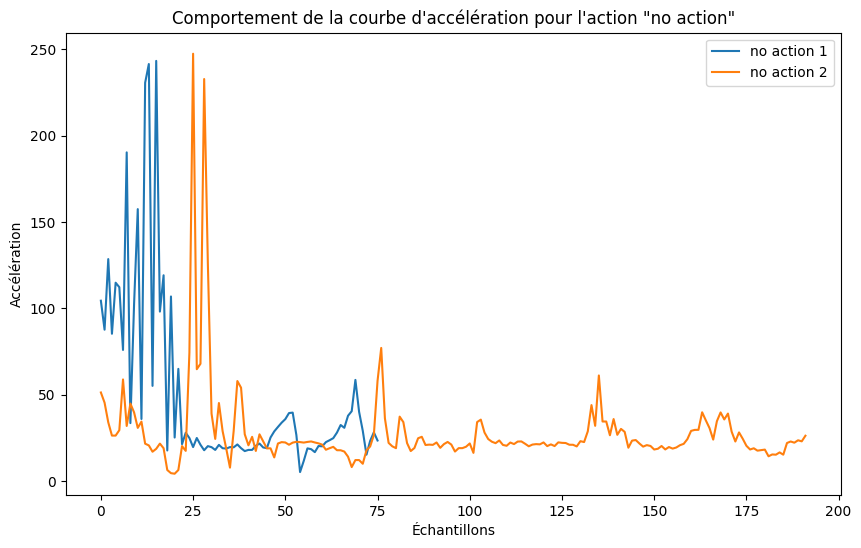

In [347]:
# Trouver les actions uniques dans les données
unique_actions = data['label'].unique()

# Tracer les courbes d'accélération pour chaque action dans un graphique unique
for action in unique_actions:
    plt.figure(figsize=(10, 6))
    plt.title(f'Comportement de la courbe d\'accélération pour l\'action "{action}"')
    plt.xlabel('Échantillons')
    plt.ylabel('Accélération')

    action_indices = data[data['label'] == action].index[:10]  # Limiter à 10 exemples par action
    for i, index in enumerate(action_indices):
        action_data = data['norm'][index]
        plt.plot(action_data, label=f'{action} {i+1}')

    plt.legend()
    plt.show()


In [348]:
# Définir un seuil pour les valeurs aberrantes (par exemple, 3 écarts types)
threshold_factor = 6  # Vous pouvez ajuster ce seuil selon vos besoins

# Trouver les labels uniques dans les données
unique_labels = data['label'].unique()

for label in unique_labels:
    # Filtrer les données pour le label actuel
    label_data = data[data['label'] == label]

    # Extraire les valeurs d'accélération de la liste
    acceleration_values = [item for sublist in label_data['norm'] for item in sublist]

    # Calculer la moyenne et l'écart-type de l'accélération
    mean_acceleration = np.mean(acceleration_values)
    std_deviation = np.std(acceleration_values)

    # Définir un seuil pour les valeurs aberrantes
    threshold = threshold_factor * std_deviation

    # Identifier les valeurs aberrantes
    outliers = label_data[[any(abs(value - mean_acceleration) > threshold) for value in label_data['norm']]]

    # Remplacer les valeurs aberrantes par la moyenne du label
    data.loc[outliers.index, 'norm'] = mean_acceleration + (4*std_deviation)

# Enregistrez les modifications dans un nouveau fichier JSON
data.to_json('/content/data_with_mean_outliers.json', orient='records')


In [349]:
dataF = pd.read_json('/content/data_with_mean_outliers.json', orient='records')


In [350]:
action_counts = dataF['label'].value_counts()
print(action_counts)

run          552
walk         435
dribble       78
rest          35
pass          32
tackle        31
shot          18
cross          4
no action      2
Name: label, dtype: int64


In [351]:
dataF[:10]

,label,norm
0,walk,"[23.1770373364, 23.3615252852, 21.535253403, 2..."
1,walk,"[20.9982143839, 19.1827980598, 18.272491463, 1..."
2,walk,"[21.9525968202, 20.6272048442, 22.5554077274, ..."
3,walk,"[19.3920974836, 19.3046066529, 18.9787708781, ..."
4,rest,"[22.0692630377, 19.6722704832, 19.8821501933, ..."
5,walk,88.843276
6,walk,"[72.4378260071, 29.1545534761, 51.004513843, 4..."
7,walk,"[56.8664579261, 24.0661714701, 39.4051715068, ..."
8,run,"[34.5874734837, 33.4232789937, 21.7133350257, ..."
9,run,"[10.6422046984, 27.1556034777, 40.4279858756, ..."


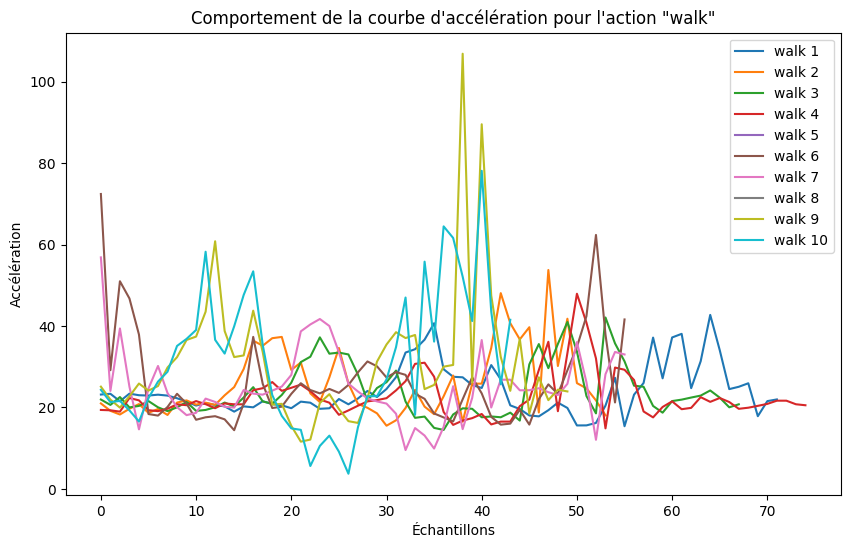

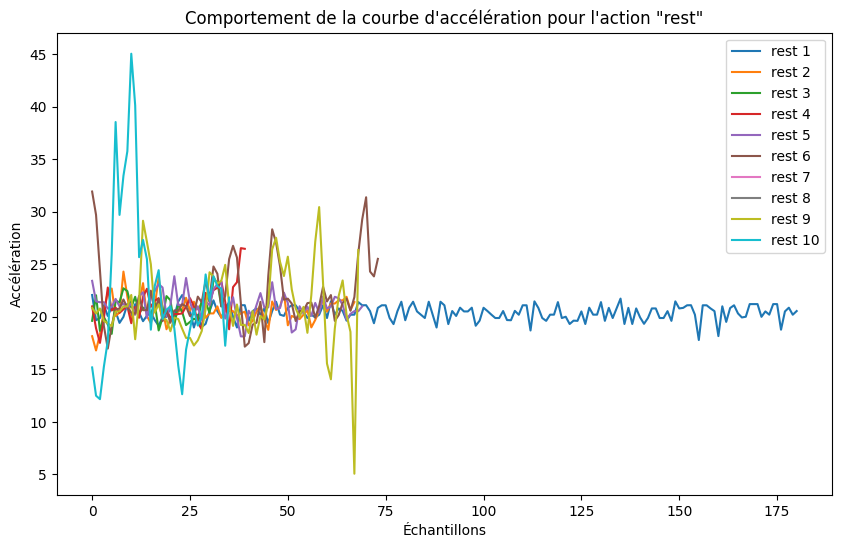

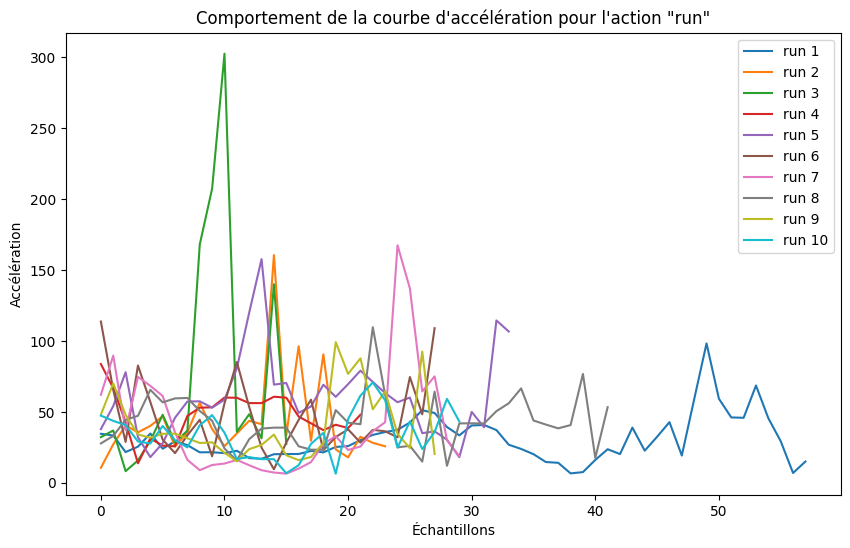

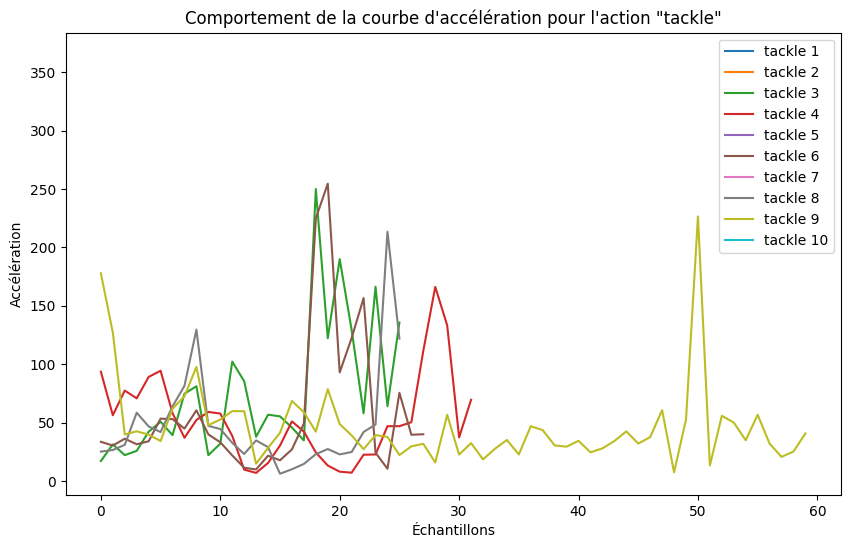

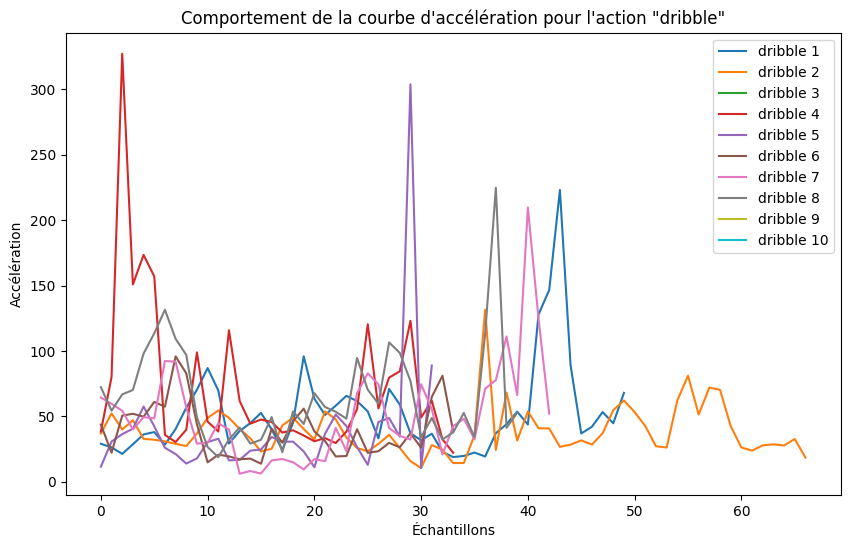

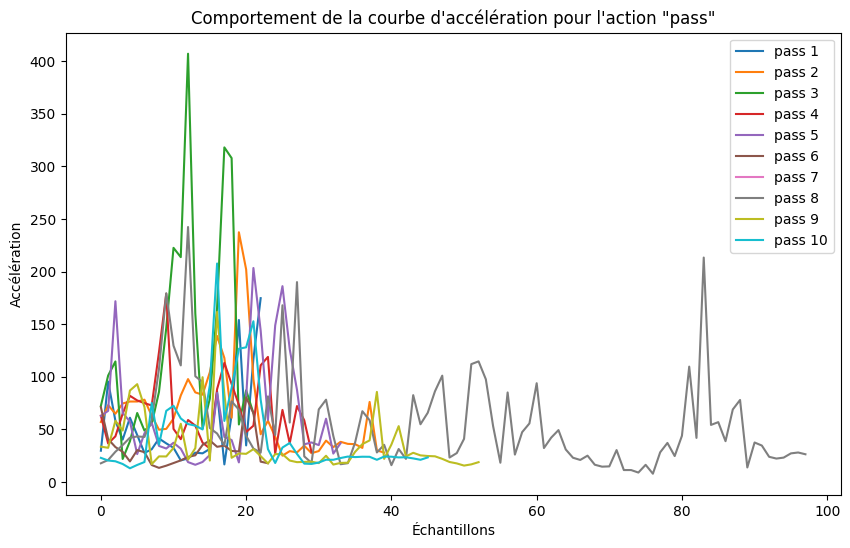

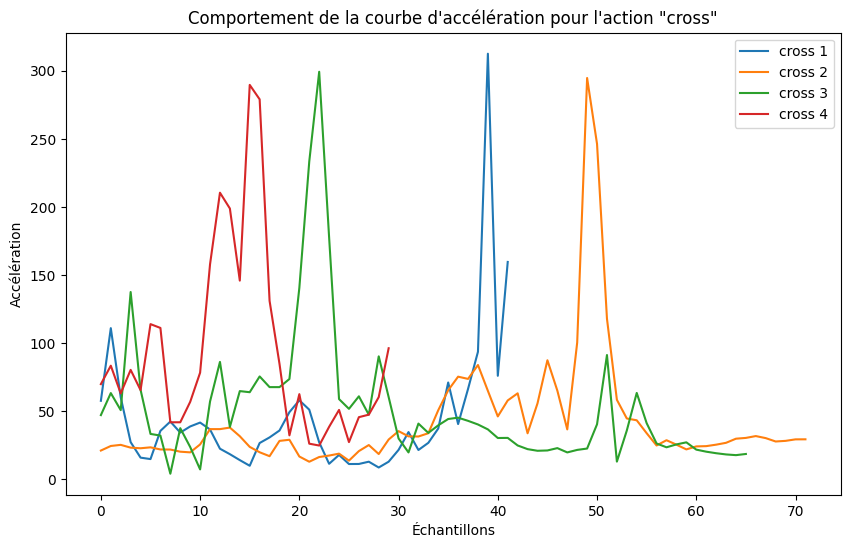

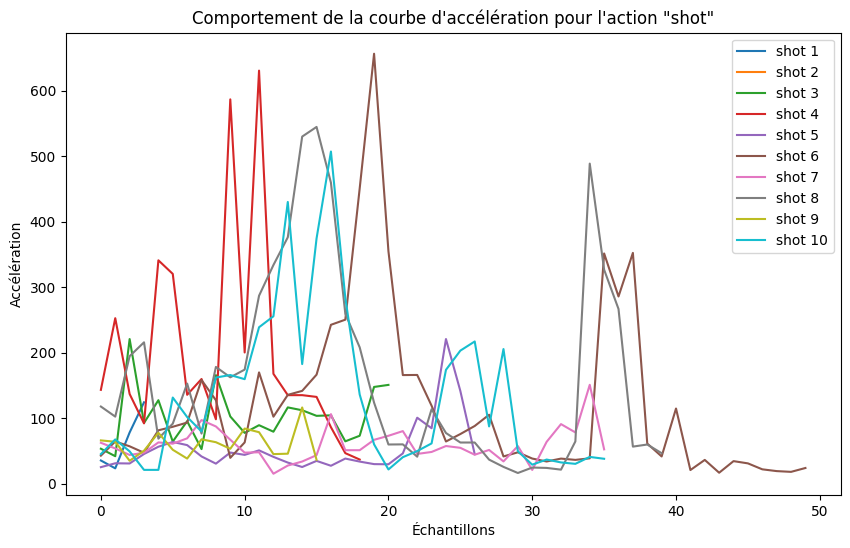

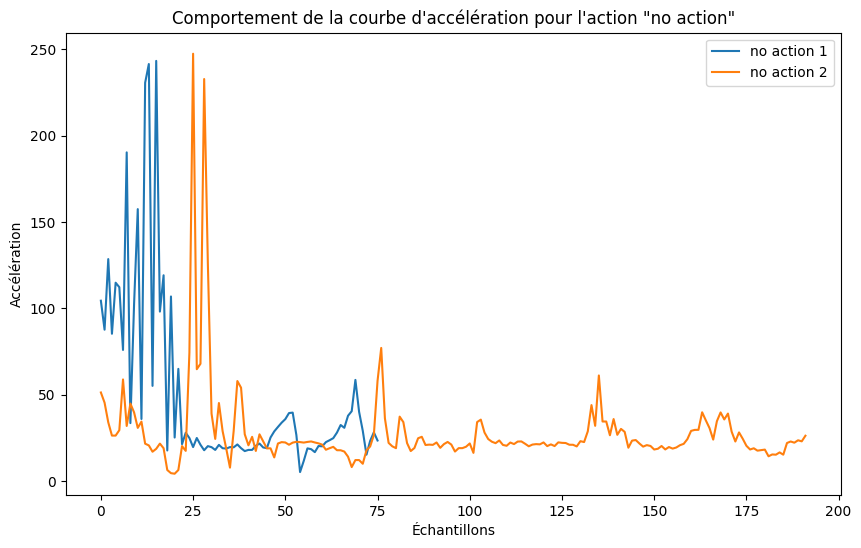

In [352]:
# Trouver les actions uniques dans les données
unique_actions = dataF['label'].unique()

# Tracer les courbes d'accélération pour chaque action dans un graphique unique
for action in unique_actions:
    plt.figure(figsize=(10, 6))
    plt.title(f'Comportement de la courbe d\'accélération pour l\'action "{action}"')
    plt.xlabel('Échantillons')
    plt.ylabel('Accélération')

    action_indices = dataF[dataF['label'] == action].index[:10]  # Limiter à 10 exemples par action
    for i, index in enumerate(action_indices):
        action_data = dataF['norm'][index]
        plt.plot(action_data, label=f'{action} {i+1}')

    plt.legend()
    plt.show()


In [353]:
# Trouver les labels uniques dans les données
unique_labels = dataF['label'].unique()

for label in unique_labels:
    # Filtrer les données pour le label actuel
    label_data = dataF[dataF['label'] == label]

    # Liste des valeurs d'accélération du label (liste imbriquée)
    acceleration_values_nested = label_data['norm'].tolist()

    # Aplatir la liste imbriquée en une seule liste
    acceleration_values = [item for sublist in acceleration_values_nested if isinstance(sublist, list) for item in sublist]

    # Conversion en tableau NumPy
    acceleration_array = np.array(acceleration_values, dtype=float)

    # Calcul des statistiques descriptives avec numpy
    if acceleration_array.size > 0:
        mean_acceleration = np.mean(acceleration_array)
        std_deviation = np.std(acceleration_array)
        median_acceleration = np.median(acceleration_array)
        min_acceleration = np.min(acceleration_array)
        max_acceleration = np.max(acceleration_array)

        print(f'Statistiques descriptives pour l\'action "{label}":')
        print(f'Moyenne d\'accélération: {mean_acceleration}')
        print(f'Écart-type d\'accélération: {std_deviation}')
        print(f'Médiane d\'accélération: {median_acceleration}')
        print(f'Valeur minimale d\'accélération: {min_acceleration}')
        print(f'Valeur maximale d\'accélération: {max_acceleration}\n')
    else:
        print(f"Aucune donnée d'accélération disponible pour l'action '{label}'.")


Statistiques descriptives pour l'action "walk":
Moyenne d'accélération: 27.449661585841774
Écart-type d'accélération: 11.81179167330708
Médiane d'accélération: 23.4974668595
Valeur minimale d'accélération: 1.9996154845
Valeur maximale d'accélération: 117.5832613883

Statistiques descriptives pour l'action "rest":
Moyenne d'accélération: 21.23313631312281
Écart-type d'accélération: 2.8608343172829276
Médiane d'accélération: 20.74595354185
Valeur minimale d'accélération: 5.0728683605
Valeur maximale d'accélération: 46.5829850741

Statistiques descriptives pour l'action "run":
Moyenne d'accélération: 48.90050658281713
Écart-type d'accélération: 33.52825507404487
Médiane d'accélération: 41.5845779509
Valeur minimale d'accélération: 2.213088907
Valeur maximale d'accélération: 333.9095754995

Statistiques descriptives pour l'action "tackle":
Moyenne d'accélération: 58.668205543695755
Écart-type d'accélération: 53.69303391685411
Médiane d'accélération: 43.5158754528
Valeur minimale d'accéléra

In [354]:
dataF[:10]

,label,norm
0,walk,"[23.1770373364, 23.3615252852, 21.535253403, 2..."
1,walk,"[20.9982143839, 19.1827980598, 18.272491463, 1..."
2,walk,"[21.9525968202, 20.6272048442, 22.5554077274, ..."
3,walk,"[19.3920974836, 19.3046066529, 18.9787708781, ..."
4,rest,"[22.0692630377, 19.6722704832, 19.8821501933, ..."
5,walk,88.843276
6,walk,"[72.4378260071, 29.1545534761, 51.004513843, 4..."
7,walk,"[56.8664579261, 24.0661714701, 39.4051715068, ..."
8,run,"[34.5874734837, 33.4232789937, 21.7133350257, ..."
9,run,"[10.6422046984, 27.1556034777, 40.4279858756, ..."


In [355]:
# Supprimer les lignes où la colonne 'norm' n'est pas une liste
dataF = dataF[dataF['norm'].apply(lambda x: isinstance(x, list))]

# Maintenant, vous pouvez calculer la longueur de chaque norme
dataF['norm_length'] = dataF['norm'].apply(len)

# Groupement des données par label
grouped_dataF = dataF.groupby('label')

# Calcul de la longueur moyenne des normes pour chaque label
mean_lengths = grouped_dataF['norm_length'].mean()

# Affichage des résultats
print("Longueur moyenne des normes pour chaque label dans dataF :")
print(mean_lengths)

# Parcourir le DataFrame et afficher les lignes où 'norm' n'est pas une liste
for index, row in dataF.iterrows():
    if not isinstance(row['norm'], list):
        print(f"Ligne {index}: 'norm' n'est pas une liste - Valeur de 'norm': {row['norm']}")


Longueur moyenne des normes pour chaque label dans dataF :
label
cross         52.500000
dribble       40.014706
no action    134.000000
pass          44.142857
rest          96.260870
run           38.135021
shot          33.058824
tackle        45.950000
walk          55.430412
Name: norm_length, dtype: float64


<ipython-input-355-d8034119e46b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataF['norm_length'] = dataF['norm'].apply(len)


In [356]:
#nous pouvons remarquer que les sequences de rest peuvent être +/- longues

In [357]:
dataF[:10]

,label,norm,norm_length
0,walk,"[23.1770373364, 23.3615252852, 21.535253403, 2...",72
1,walk,"[20.9982143839, 19.1827980598, 18.272491463, 1...",54
2,walk,"[21.9525968202, 20.6272048442, 22.5554077274, ...",68
3,walk,"[19.3920974836, 19.3046066529, 18.9787708781, ...",75
4,rest,"[22.0692630377, 19.6722704832, 19.8821501933, ...",181
6,walk,"[72.4378260071, 29.1545534761, 51.004513843, 4...",56
7,walk,"[56.8664579261, 24.0661714701, 39.4051715068, ...",56
8,run,"[34.5874734837, 33.4232789937, 21.7133350257, ...",58
9,run,"[10.6422046984, 27.1556034777, 40.4279858756, ...",24
10,run,"[32.2336881275, 36.8980928969, 8.2447133278, 1...",16


In [358]:
# Calculer la moyenne de chaque série d'accélérations et ajouter une nouvelle colonne
dataF['mean_acceleration'] = dataF['norm'].apply(np.mean)

# Calculer l'écart-type de chaque série d'accélérations et ajouter une nouvelle colonne
dataF['std_deviation'] = dataF['norm'].apply(np.std)

# Calculer la médiane de chaque série d'accélérations et ajouter une nouvelle colonne
dataF['median_acceleration'] = dataF['norm'].apply(np.median)

# Calculer la longueur de chaque série d'accélérations et ajouter une nouvelle colonne
dataF['norm_length'] = dataF['norm'].apply(len)

# Calculer la valeur maximale de chaque série d'accélérations et ajouter une nouvelle colonne
dataF['max_acceleration'] = dataF['norm'].apply(max)

# Calculer la valeur maximale de chaque série d'accélérations et ajouter une nouvelle colonne
dataF['min_acceleration'] = dataF['norm'].apply(min)

# Calculer le nombre d'accélérations supérieures à mean + sd et ajouter une nouvelle colonne
dataF['count_above_threshold'] = dataF.apply(lambda row: sum(1 for value in row['norm'] if value >  row['mean_acceleration'] + 4* row['std_deviation']), axis=1)

# Fonction pour calculer la variance entre les valeurs d'une liste
def calculate_mean_variance(norm):
    if len(norm) < 2:
        return 0.0  # Variance undefined for fewer than 2 values
    return np.mean(np.diff(norm))  # Calcul de la variance moyenne entre chaque accélération

# Ajouter une nouvelle colonne pour la variance moyenne
dataF['mean_variance'] = dataF['norm'].apply(calculate_mean_variance)

# Afficher les premières lignes de dataF pour vérifier les modifications
print(dataF.head(10))




<ipython-input-358-4780de4022b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataF['mean_acceleration'] = dataF['norm'].apply(np.mean)
<ipython-input-358-4780de4022b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataF['std_deviation'] = dataF['norm'].apply(np.std)


   label                                               norm  norm_length  \
0   walk  [23.1770373364, 23.3615252852, 21.535253403, 2...           72   
1   walk  [20.9982143839, 19.1827980598, 18.272491463, 1...           54   
2   walk  [21.9525968202, 20.6272048442, 22.5554077274, ...           68   
3   walk  [19.3920974836, 19.3046066529, 18.9787708781, ...           75   
4   rest  [22.0692630377, 19.6722704832, 19.8821501933, ...          181   
6   walk  [72.4378260071, 29.1545534761, 51.004513843, 4...           56   
7   walk  [56.8664579261, 24.0661714701, 39.4051715068, ...           56   
8    run  [34.5874734837, 33.4232789937, 21.7133350257, ...           58   
9    run  [10.6422046984, 27.1556034777, 40.4279858756, ...           24   
10   run  [32.2336881275, 36.8980928969, 8.2447133278, 1...           16   

    mean_acceleration  std_deviation  median_acceleration  max_acceleration  \
0           24.166958       5.965416            22.417711         42.738486   
1    

In [359]:
from sklearn.model_selection import train_test_split

# Sélectionner X (caractéristiques) et y (étiquettes)
X = dataF[['mean_acceleration', 'std_deviation', 'median_acceleration', 'norm_length', 'max_acceleration','min_acceleration', 'count_above_threshold']]
#X = dataF[['mean_acceleration', 'std_deviation', 'norm_length',  'count_above_threshold']]
y = dataF['label']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement X : ", X_train.shape)
print("Dimensions de l'ensemble de test X : ", X_test.shape)
print("Dimensions de l'ensemble d'entraînement y : ", y_train.shape)
print("Dimensions de l'ensemble de test y : ", y_test.shape)


Dimensions de l'ensemble d'entraînement X :  (768, 7)
Dimensions de l'ensemble de test X :  (256, 7)
Dimensions de l'ensemble d'entraînement y :  (768,)
Dimensions de l'ensemble de test y :  (256,)


In [360]:
dataF

,label,norm,norm_length,mean_acceleration,std_deviation,median_acceleration,max_acceleration,min_acceleration,count_above_threshold,mean_variance
0,walk,"[23.1770373364, 23.3615252852, 21.535253403, 2...",72,24.166958,5.965416,22.417711,42.738486,15.392703,0,-0.016894
1,walk,"[20.9982143839, 19.1827980598, 18.272491463, 1...",54,26.026276,8.479134,22.864346,53.767061,15.520896,0,-0.055128
2,walk,"[21.9525968202, 20.6272048442, 22.5554077274, ...",68,23.998177,6.328823,21.584619,42.105998,14.484489,0,-0.017521
3,walk,"[19.3920974836, 19.3046066529, 18.9787708781, ...",75,22.596573,5.545197,20.998214,47.934160,14.867721,1,0.015597
4,rest,"[22.0692630377, 19.6722704832, 19.8821501933, ...",181,20.378778,0.739506,20.509409,22.069263,17.789805,0,-0.008461
...,...,...,...,...,...,...,...,...,...,...
1182,walk,"[23.33730577, 20.2109879112, 25.0641297861, 23...",52,29.107628,10.920141,24.723429,65.462316,11.190245,0,-0.033921
1183,walk,"[22.4703228139, 22.552427731, 23.8426232022, 2...",64,26.673605,8.728731,23.684421,51.724442,11.657530,0,0.092159
1184,walk,"[43.8336127058, 46.1804599858, 37.492367105, 3...",60,28.842287,12.171922,23.424746,89.365797,15.539368,1,-0.241922
1185,walk,"[30.9275992558, 31.2635825881, 28.2869436092, ...",66,25.121496,9.942930,23.016231,71.505826,7.309930,1,0.075785


In [361]:
# Afficher les données d'entraînement
print("Données d'entraînement (X_train) :")
print(X_train)
print("Étiquettes d'entraînement (y_train) :")
print(y_train)


Données d'entraînement (X_train) :
      mean_acceleration  std_deviation  median_acceleration  norm_length  \
1181          29.834811      12.249381            24.792167           50   
1070          70.553882      40.171203            60.990438           32   
36            31.507417      12.205810            28.662032           46   
298           27.300093      13.137169            23.641920           46   
240           22.658234       5.149447            20.913864           56   
...                 ...            ...                  ...          ...   
124           44.432240      11.455020            44.225961           36   
312           27.100308      13.881548            22.829663           52   
1003          25.127896       5.092940            25.316025           18   
502           28.323047      12.395438            24.600720           48   
119           53.210614      36.994256            48.709404           32   

      max_acceleration  min_acceleration  count_abov

In [362]:
y_train.unique()

array(['walk', 'run', 'dribble', 'tackle', 'rest', 'cross', 'pass',
       'shot', 'no action'], dtype=object)

In [363]:
y_test.unique()

array(['walk', 'pass', 'run', 'dribble', 'tackle', 'shot', 'rest'],
      dtype=object)

In [364]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report


# Créer un modèle de régression logistique
model = LogisticRegression(max_iter=10000)

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédire les classes sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer le F1-score
f1_logistic = f1_score(y_test, y_pred, average='weighted')

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)

# Afficher l'accuracy et le F1-score
print(f"Précision du modèle de régression logistique : {accuracy:.2f}")
print(f"Régression logistique - F1 Score : {f1_logistic:.2f}")

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))

# Prédire les classes sur l'ensemble de test
y_pred = model.predict(X_test)

# Ajouter les prédictions et les étiquettes réelles à un DataFrame pour affichage
results = pd.DataFrame({'Vraie classe': y_test, 'Classe prédite': y_pred})

# Afficher les résultats
print(results)


Précision du modèle de régression logistique : 0.82
Régression logistique - F1 Score : 0.78
              precision    recall  f1-score   support

       cross       0.00      0.00      0.00         0
     dribble       0.00      0.00      0.00        15
        pass       0.67      0.22      0.33         9
        rest       0.60      1.00      0.75         3
         run       0.79      0.92      0.85       120
        shot       0.50      0.20      0.29         5
      tackle       0.00      0.00      0.00         4
        walk       0.90      0.94      0.92       100

    accuracy                           0.82       256
   macro avg       0.43      0.41      0.39       256
weighted avg       0.76      0.82      0.78       256

     Vraie classe Classe prédite
610          walk           walk
420          pass            run
512          walk           walk
34            run            run
713          walk           walk
...           ...            ...
434        tackle         

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with n

In [365]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Encoder les labels en valeurs numériques
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# Déterminer le nombre de caractéristiques
nombre_de_features = X.shape[1]

# Créer un modèle de réseau de neurones
model = keras.Sequential([
    keras.layers.Input(shape=(nombre_de_features,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(9, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.1)

# Évaluer les performances du modèle
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Précision du modèle de réseau de neurones : {test_accuracy:.2f}')

# Prédire les classes sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1).numpy()

# Calculer le F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score du modèle de réseau de neurones : {f1:.2f}')



Epoch 1/30
11/11 [==============================] - 1s 15ms/step - loss: 24.3604 - accuracy: 0.0232 - val_loss: 14.0718 - val_accuracy: 0.1169
Epoch 2/30
11/11 [==============================] - 0s 3ms/step - loss: 7.3780 - accuracy: 0.2894 - val_loss: 2.1192 - val_accuracy: 0.5195
Epoch 3/30
11/11 [==============================] - 0s 3ms/step - loss: 2.7999 - accuracy: 0.6035 - val_loss: 2.5990 - val_accuracy: 0.7532
Epoch 4/30
11/11 [==============================] - 0s 3ms/step - loss: 2.4520 - accuracy: 0.6657 - val_loss: 1.5540 - val_accuracy: 0.6234
Epoch 5/30
11/11 [==============================] - 0s 3ms/step - loss: 1.7243 - accuracy: 0.6281 - val_loss: 1.1150 - val_accuracy: 0.8052
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 1.3717 - accuracy: 0.7308 - val_loss: 1.0634 - val_accuracy: 0.7143
Epoch 7/30
11/11 [==============================] - 0s 4ms/step - loss: 1.1918 - accuracy: 0.7120 - val_loss: 0.9618 - val_accuracy: 0.8052
Epoch 8/30
11/11 

In [366]:
# Prédire les classes sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1).numpy()

# Convertir les prédictions en classes de base à l'aide de l'encodeur
y_pred = label_encoder.inverse_transform(y_pred)

# Convertir les étiquettes de test en classes de base
y_test = label_encoder.inverse_transform(y_test)

# Afficher les résultats de prédiction
for true_class, predicted_class in zip(y_test, y_pred):
    print(f'Vraie classe : {true_class}, Classe prédite : {predicted_class}')


8/8 [==============================] - 0s 1ms/step
Vraie classe : walk, Classe prédite : walk
Vraie classe : pass, Classe prédite : run
Vraie classe : walk, Classe prédite : walk
Vraie classe : run, Classe prédite : run
Vraie classe : walk, Classe prédite : walk
Vraie classe : walk, Classe prédite : walk
Vraie classe : run, Classe prédite : walk
Vraie classe : dribble, Classe prédite : run
Vraie classe : walk, Classe prédite : walk
Vraie classe : dribble, Classe prédite : run
Vraie classe : walk, Classe prédite : walk
Vraie classe : walk, Classe prédite : walk
Vraie classe : run, Classe prédite : run
Vraie classe : tackle, Classe prédite : run
Vraie classe : walk, Classe prédite : walk
Vraie classe : walk, Classe prédite : walk
Vraie classe : walk, Classe prédite : walk
Vraie classe : walk, Classe prédite : walk
Vraie classe : walk, Classe prédite : walk
Vraie classe : run, Classe prédite : run
Vraie classe : walk, Classe prédite : walk
Vraie classe : run, Classe prédite : walk
Vraie c

In [367]:
import pandas as pd
from sklearn.metrics import classification_report

# Créer un DataFrame à partir des prédictions et des étiquettes de test
df = pd.DataFrame({'Vraie classe': y_test, 'Classe prédite': y_pred})

# Générer un rapport de classification
report = classification_report(df['Vraie classe'], df['Classe prédite'], output_dict=True)

# Afficher les statistiques par label
for label, stats in report.items():
    if label != 'accuracy':  # Exclure la ligne de précision globale
        print(f'Statistiques pour le label "{label}":')
        print(f'F1-score: {stats["f1-score"]:.2f}')
        print(f'Support: {stats["support"]}')
        print()


Statistiques pour le label "dribble":
F1-score: 0.00
Support: 15

Statistiques pour le label "pass":
F1-score: 0.20
Support: 9

Statistiques pour le label "rest":
F1-score: 0.67
Support: 3

Statistiques pour le label "run":
F1-score: 0.80
Support: 120

Statistiques pour le label "shot":
F1-score: 0.50
Support: 5

Statistiques pour le label "tackle":
F1-score: 0.00
Support: 4

Statistiques pour le label "walk":
F1-score: 0.88
Support: 100

Statistiques pour le label "macro avg":
F1-score: 0.43
Support: 256

Statistiques pour le label "weighted avg":
F1-score: 0.74
Support: 256



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [368]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Créer un modèle de régression logistique avec pondération de classe
model = LogisticRegression(class_weight='balanced')

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédire les classes sur l'ensemble de test
y_pred = model.predict(X_test)

from sklearn.preprocessing import LabelEncoder

# Encoder les étiquettes en valeurs numériques
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# ...

# Après avoir prédit les étiquettes
y_pred = model.predict(X_test)

# Inversez la transformation pour obtenir les étiquettes originales sous forme de chaînes de caractères
y_pred = label_encoder.inverse_transform(y_pred)

# Assurez-vous que les étiquettes sont maintenant des chaînes de caractères
#print(y_pred)

# Maintenant, calculez le F1-score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle de régression logistique : {accuracy:.2f}")
print(f"Régression logistique - F1 Score : {f1_logistic:.2f}")

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))


Précision du modèle de régression logistique : 0.52
Régression logistique - F1 Score : 0.78
              precision    recall  f1-score   support

       cross       0.00      0.00      0.00         0
     dribble       0.00      0.00      0.00        15
        pass       0.12      0.33      0.18         9
        rest       0.21      1.00      0.35         3
         run       0.90      0.32      0.47       120
        shot       0.19      0.60      0.29         5
      tackle       0.00      0.00      0.00         4
        walk       0.83      0.86      0.84       100

    accuracy                           0.52       256
   macro avg       0.28      0.39      0.27       256
weighted avg       0.76      0.52      0.57       256



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

In [369]:
#le model est inneficace concernant les labels peu utilisés dans la base de données puisque ce sont des actions "rares" dans le match comme "cross" et "tackle"

In [370]:
# Créer un modèle de réseau de neurones fictif (à remplacer par votre modèle réel)
model = keras.Sequential([
    keras.layers.Input(shape=(nombre_de_features,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(9, activation='softmax')
])

# Compiler le modèle (assurez-vous d'utiliser les paramètres réels)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle (assurez-vous d'utiliser vos propres données d'entraînement)
model.fit(X_train, y_train, epochs=60, batch_size=16, validation_split=0.1)


Epoch 1/60
44/44 [==============================] - 1s 5ms/step - loss: 7.1399 - accuracy: 0.4327 - val_loss: 1.7217 - val_accuracy: 0.7403
Epoch 2/60
44/44 [==============================] - 0s 2ms/step - loss: 1.5228 - accuracy: 0.7250 - val_loss: 1.1201 - val_accuracy: 0.6883
Epoch 3/60
44/44 [==============================] - 0s 2ms/step - loss: 1.0615 - accuracy: 0.7525 - val_loss: 0.8883 - val_accuracy: 0.7662
Epoch 4/60
44/44 [==============================] - 0s 2ms/step - loss: 0.9310 - accuracy: 0.7467 - val_loss: 0.8947 - val_accuracy: 0.8182
Epoch 5/60
44/44 [==============================] - 0s 2ms/step - loss: 0.8923 - accuracy: 0.7337 - val_loss: 0.8572 - val_accuracy: 0.7922
Epoch 6/60
44/44 [==============================] - 0s 2ms/step - loss: 0.8712 - accuracy: 0.7482 - val_loss: 0.9120 - val_accuracy: 0.8052
Epoch 7/60
44/44 [==============================] - 0s 2ms/step - loss: 0.8708 - accuracy: 0.7438 - val_loss: 0.7712 - val_accuracy: 0.8312
Epoch 8/60
44/44 [==

In [376]:
dataF[40:60]

,label,norm,norm_length,mean_acceleration,std_deviation,median_acceleration,max_acceleration,min_acceleration,count_above_threshold,mean_variance
43,run,"[28.0378160281, 32.7672887284, 43.1366501977, ...",38,79.362712,53.929951,70.873657,333.909575,28.037816,1,0.085569
45,run,"[143.5735669665, 80.7634194885, 33.4074722271,...",28,64.297611,32.218026,58.593705,147.201517,22.715972,0,0.134369
46,run,"[329.4054224415, 80.1589275095, 65.7174411781,...",32,96.656248,62.191649,69.701373,329.405422,33.973668,0,-9.232221
49,walk,"[42.4475582648, 49.5956661992, 44.2187413233, ...",42,43.424937,16.988184,43.776859,92.036919,13.039938,0,-0.203022
50,run,"[25.7446469598, 26.1111558988, 27.4516309205, ...",40,39.621124,23.116399,31.004184,157.241851,17.794342,1,0.082675
51,run,"[33.8973987957, 51.0828349117, 53.595695754, 5...",42,52.798199,20.113721,50.907726,114.179979,20.122194,0,0.640414
52,run,"[45.5570415686, 47.3867622356, 59.0308596746, ...",30,48.842474,22.024194,47.474089,112.219425,12.594356,0,0.153992
53,run,"[88.8964565758, 23.5899118502, 49.8049466359, ...",36,36.981564,19.967424,32.855121,88.896457,10.648552,0,-1.241403
54,run,"[40.5509475817, 47.1013755028, 42.5688187935, ...",20,32.861792,16.662474,34.082620,65.018584,6.198375,0,-0.586125
56,run,"[23.073536083, 18.0120820872, 17.2485592658, 3...",18,44.829198,23.086799,39.993573,96.941651,17.248559,0,1.623749


In [377]:
# Assurez-vous que 'dataF' contient les données de votre DataFrame

# Sélectionnez les 10 premières séries de 'norm'
series_test = dataF['norm'][40:60]

# Créez une liste vide pour stocker les 10 actions confondues
actions_confondues = []

# Concaténez les séries dans une seule liste
actions_confondues = [acceleration for series in series_test for acceleration in series]

# Assurez-vous que 'actions_confondues' contient maintenant les accélérations de 10 actions confondues


In [378]:
actions_confondues

[28.0378160281,
 32.7672887284,
 43.1366501977,
 70.2603500653,
 70.1298404758,
 44.0425606691,
 39.6330169473,
 31.1777013874,
 55.5346047585,
 34.8274750999,
 50.9969976101,
 72.1765233462,
 79.7298172878,
 93.7703857628,
 142.2952815268,
 145.8343843536,
 139.6070368339,
 150.3272616765,
 107.7704715941,
 46.93664592,
 50.1616944818,
 74.0707952772,
 99.8421482324,
 101.4597816417,
 90.2391388242,
 71.4869633627,
 54.6695016044,
 66.7720264695,
 31.5407472491,
 74.56033836739999,
 86.3134330149,
 85.7596095687,
 40.8869500806,
 86.129032478,
 41.5229159598,
 333.9095754995,
 116.262428794,
 31.2038726404,
 143.5735669665,
 80.7634194885,
 33.4074722271,
 60.173109169,
 62.7315794338,
 57.0143000071,
 41.9866872643,
 66.1165549918,
 79.5083804411,
 72.5014099615,
 107.8219668819,
 107.7586636247,
 22.7159721271,
 73.2781998685,
 53.7673352882,
 66.8650403313,
 50.8849508577,
 42.3874167771,
 42.3874167771,
 29.5101123917,
 75.7919748977,
 42.1994706455,
 42.2522290402,
 39.8022428234

In [379]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, classification_report

# Initialisation des données et du modèle
# ... (remplacez par vos données et modèle)

# Seuils de confiance
seuil_confiance = 0.8 # Seuil de confiance pour considérer une action comme détectée
fenetre_minimale = 20  # Taille de la fenêtre initiale
pas = 5  # Augmentation de la taille de la fenêtre à chaque itération

# Initialisation des variables
actions_detectees = []  # Pour stocker les actions détectées
fenetre = []  # Pour stocker les accélérations de la fenêtre actuelle

#...
for acceleration in actions_confondues:
    fenetre.append(acceleration)  # Ajouter l'accélération à la fenêtre
    if len(fenetre) >= fenetre_minimale:
        # Préparer les caractéristiques pour la fenêtre actuelle
        fenetre_features = []
        fenetre_features.append(np.mean(fenetre))
        fenetre_features.append(np.std(fenetre))
        fenetre_features.append(np.median(fenetre))
        fenetre_features.append(len(fenetre))
        fenetre_features.append(np.max(fenetre))
        fenetre_features.append(np.min(fenetre))
        # Calculer le nombre d'éléments supérieurs à un seuil (à définir)
        seuil = 0.0  # Remplacez par le seuil approprié
        count_above_threshold = len([val for val in fenetre if val > seuil])
        fenetre_features.append(count_above_threshold)

        # Prédire l'action avec les caractéristiques de la fenêtre actuelle
        fenetre_pred = model.predict(np.array([fenetre_features]))
        classe_predite = np.argmax(fenetre_pred)
        confiance = np.max(fenetre_pred)

        if confiance >= seuil_confiance:
            # Action détectée avec une confiance suffisante
            action_predite = label_encoder.inverse_transform([classe_predite])[0]
            actions_detectees.append((action_predite, confiance,len(fenetre)))
            fenetre = []  # Réinitialiser la fenêtre
#...


        else:
            # Augmenter la taille de la fenêtre
            fenetre_minimale += pas

# Afficher les actions détectées
for action, confiance, longueur in actions_detectees:
    print(f"Action détectée : {action} (Confiance : {confiance:.2f} longueur {longueur}")




1/1 [==============================] - 0s 14ms/step
Action détectée : run (Confiance : 1.00 longueur 40
Action détectée : run (Confiance : 1.00 longueur 40
Action détectée : run (Confiance : 1.00 longueur 40
Action détectée : walk (Confiance : 0.91 longueur 40
Action détectée : walk (Confiance : 0.89 longueur 55
Action détectée : walk (Confiance : 0.97 longueur 55
Action détectée : walk (Confiance : 0.99 longueur 55
Action détectée : run (Confiance : 0.96 longueur 55
Action détectée : walk (Confiance : 0.88 longueur 65
Action détectée : walk (Confiance : 0.95 longueur 65
Action détectée : run (Confiance : 0.89 longueur 65
Action détectée : walk (Confiance : 0.81 longueur 65
Action détectée : rest (Confiance : 0.99 longueur 65
Action détectée : rest (Confiance : 0.81 longueur 65


J'ai essayé d'implementer une **classification** pour ensuite en prenant une sequence d'acceleration d'un match pour pouvoir la decouper en petite sequence et predire chaque action augmenter la longueur de la sequence si le seuil de prediction de la sequence est faible.
J'ai essayé plusieurs **model** de classification pour finalement opter pour **le reseau de neuronnes.**
J'ai créé de nouveaux features comme la moyenne de la "norm" et l'ecart type pour pouvoir faire la classification